In [1]:
import pandas as pd
import json
import requests
from api_keys import crime_api_key
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
va_data = pd.read_csv("nibrs_incident_2010_VA.csv")
va_data.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,agency_id,incident_id,nibrs_month_id,incident_number,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,ddocname,orig_format,ff_line_number,did
0,20092,56970081,5153286,20100101001,NaN,NaN,2010-01-01 00:00:00,NaN,0.0,6,NaN,0,C,2010_01_VA0160200_20100101001_INC_NIBRS,NaN,NaN,NaN
1,20092,56970082,5153286,20100111001,NaN,NaN,2010-01-11 00:00:00,NaN,NaN,6,NaN,0,C,2010_01_VA0160200_20100111001_INC_NIBRS,NaN,NaN,NaN
2,20092,56970097,5153286,20100607001,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,6,NaN,0,C,2010_01_VA0160200_20100607001_INC_NIBRS,NaN,NaN,NaN
3,20092,56970083,5175179,20100212001,NaN,NaN,2010-02-12 00:00:00,NaN,20.0,6,NaN,0,C,2010_02_VA0160200_20100212001_INC_NIBRS,NaN,NaN,NaN
4,20092,56970084,5175179,20100213001,NaN,NaN,2010-02-11 00:00:00,NaN,NaN,6,NaN,0,C,2010_02_VA0160200_20100213001_INC_NIBRS,NaN,NaN,NaN


In [3]:
va_data_formated = va_data[["incident_date", "ddocname"]]
va_data_formated.head()

,incident_date,ddocname
0,2010-01-01 00:00:00,2010_01_VA0160200_20100101001_INC_NIBRS
1,2010-01-11 00:00:00,2010_01_VA0160200_20100111001_INC_NIBRS
2,2010-01-01 00:00:00,2010_01_VA0160200_20100607001_INC_NIBRS
3,2010-02-12 00:00:00,2010_02_VA0160200_20100212001_INC_NIBRS
4,2010-02-11 00:00:00,2010_02_VA0160200_20100213001_INC_NIBRS


In [4]:
va_data_formated["incident_date"] = va_data_formated["incident_date"].str[:7]
va_data_formated["ddocname"] = va_data_formated["ddocname"].str[8:17]
va_data_formated.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,incident_date,ddocname
0,2010-01,VA0160200
1,2010-01,VA0160200
2,2010-01,VA0160200
3,2010-02,VA0160200
4,2010-02,VA0160200


In [5]:
va_data_formated.count()

incident_date    433182
ddocname         433182
dtype: int64

In [6]:
info_plot = va_data_formated.groupby("incident_date").count()
info_plot.head()

,ddocname
incident_date,
2010-01,33169
2010-02,27231
2010-03,36735
2010-04,37683
2010-05,38690


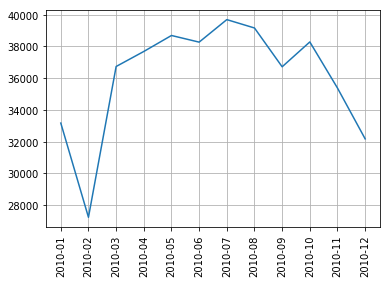

In [7]:
plt.plot(info_plot.index, info_plot.ddocname)
plt.xticks(rotation=90)
plt.grid()

In [8]:
va_data_filtered = va_data_formated.loc[(va_data_formated["ddocname"] == "VA0540000") | 
                                        (va_data_formated["ddocname"] == "VA054SP00") |
                                        (va_data_formated["ddocname"] == "VA0540100"), :]
va_data_filtered.ddocname.count()

781

In [9]:
va_data_filtered.head()

,incident_date,ddocname
13341,2010-01,VA0540000
13342,2010-01,VA0540000
13343,2010-01,VA0540000
13344,2010-01,VA0540000
13345,2010-01,VA0540000


In [10]:
info_plot_filtered = va_data_filtered.groupby("incident_date").count()
info_plot_filtered.head()

,ddocname
incident_date,
2010-01,63
2010-02,15
2010-03,26
2010-04,39
2010-05,61


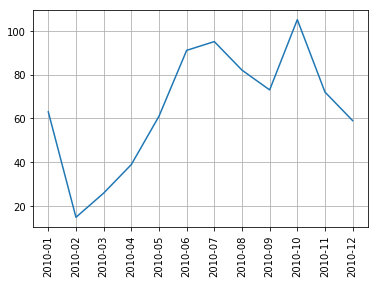

In [11]:
plt.plot(info_plot_filtered.index, info_plot_filtered.ddocname)
plt.xticks(rotation=90)
plt.grid()